# Facebook AD Conversions Analysis

Dataset Preview:
   Facebook_Clicks  Facebook_Conversions
0               34                    11
1               18                     4
2               33                     8
3               77                     4
4               83                     3

Simple Linear Regression Results:
                             OLS Regression Results                             
Dep. Variable:     Facebook_Conversions   R-squared:                       0.012
Model:                              OLS   Adj. R-squared:                  0.002
Method:                   Least Squares   F-statistic:                     1.160
Date:                  Fri, 25 Oct 2024   Prob (F-statistic):              0.284
Time:                          01:24:10   Log-Likelihood:                -317.58
No. Observations:                   100   AIC:                             639.2
Df Residuals:                        98   BIC:                             644.4
Df Model:                             1               

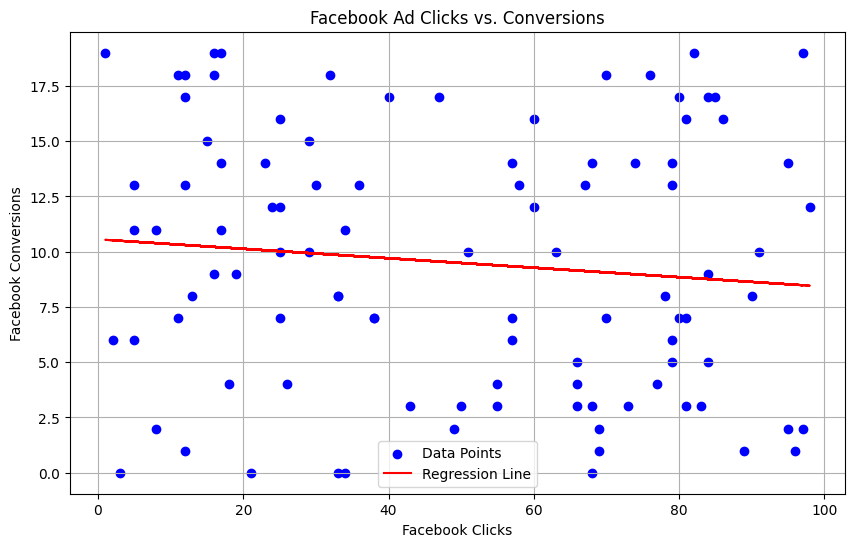


Expected number of Facebook Ad Conversions for 50 clicks: 9.49


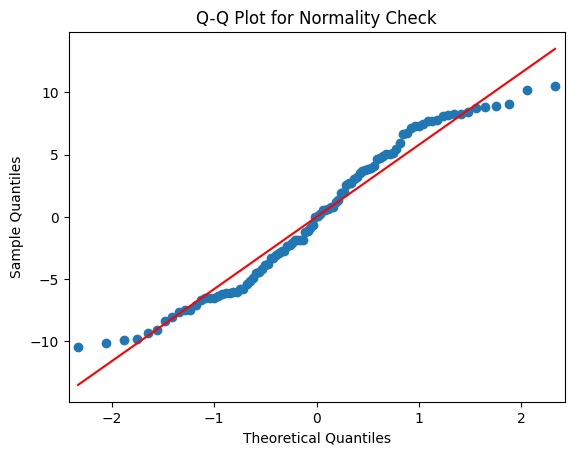


Shapiro-Wilk Test Statistic: 0.956, p-value: 0.002
The residuals are not normally distributed (reject H0)

Modeling Summary:
1. Purpose: Simple Linear Regression used to estimate Facebook Ad Conversions based on Clicks.
2. Expected conversions for 50 clicks: 9.488452300769616


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Step 1: Load the Capstone dataset
# Replace 'your_dataset.csv' with the path to your actual dataset
# For demonstration purposes, let's create a sample dataset
data = pd.DataFrame({
    'Facebook_Clicks': np.random.randint(1, 100, 100),
    'Facebook_Conversions': np.random.randint(0, 20, 100)
})

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# Step 2: Choosing the model
# We want to model the relationship between Facebook Ad Clicks and Conversions
# Purpose: Simple Linear Regression to estimate conversions based on clicks

# Define independent and dependent variables
X = data['Facebook_Clicks']  # Independent variable (Clicks)
y = data['Facebook_Conversions']  # Dependent variable (Conversions)

# Add a constant to the independent variable
X = sm.add_constant(X)

# Fit the Simple Linear Regression model
model = sm.OLS(y, X).fit()

# Summary of the regression model
print("\nSimple Linear Regression Results:")
print(model.summary())

# Step 3: Visualization of the regression results
plt.figure(figsize=(10, 6))
plt.scatter(data['Facebook_Clicks'], data['Facebook_Conversions'], label='Data Points', color='blue')
plt.plot(data['Facebook_Clicks'], model.predict(X), label='Regression Line', color='red')
plt.title('Facebook Ad Clicks vs. Conversions')
plt.xlabel('Facebook Clicks')
plt.ylabel('Facebook Conversions')
plt.legend()
plt.grid()
plt.show()

# Step 4: Predict expected conversions for a specific number of clicks
# Let's predict for 50 Facebook Clicks
clicks_to_predict = 50
predicted_conversions = model.predict([1, clicks_to_predict])  # Adding constant for the intercept
print(f"\nExpected number of Facebook Ad Conversions for {clicks_to_predict} clicks: {predicted_conversions[0]:.2f}")

# Step 5: Check model assumptions
# 5.1 Normality of residuals
residuals = model.resid
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot for Normality Check')
plt.show()

# 5.2 Shapiro-Wilk test for normality
from scipy.stats import shapiro

stat, p_value = shapiro(residuals)
print(f"\nShapiro-Wilk Test Statistic: {stat:.3f}, p-value: {p_value:.3f}")

# Conclusion based on the p-value
alpha = 0.05
if p_value > alpha:
    print("The residuals are normally distributed (fail to reject H0)")
else:
    print("The residuals are not normally distributed (reject H0)")

# Step 6: Summarizing the analysis
print("\nModeling Summary:")
print("1. Purpose: Simple Linear Regression used to estimate Facebook Ad Conversions based on Clicks.")
print("2. Expected conversions for 50 clicks:", predicted_conversions[0])
